In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Building the Convolutional Neural Network (CNN) model
model = Sequential([  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Training the model
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=200)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.8380 - loss: 0.5657 - val_accuracy: 0.9798 - val_loss: 0.0651
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 76s 152ms/step - accuracy: 0.9785 - loss: 0.0695 - val_accuracy: 0.9850 - val_loss: 0.0478
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9878 - val_loss: 0.0369
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9894 - val_loss: 0.0344
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.9909 - loss: 0.0305 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 161ms/step - accuracy: 0.9932 - loss: 0.0221 - val_accuracy: 0.9891 - val_loss: 0.0307
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 79s 151ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9911 - val_loss: 0.0284
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 151ms/step - accuracy: 0.9949 - loss: 0

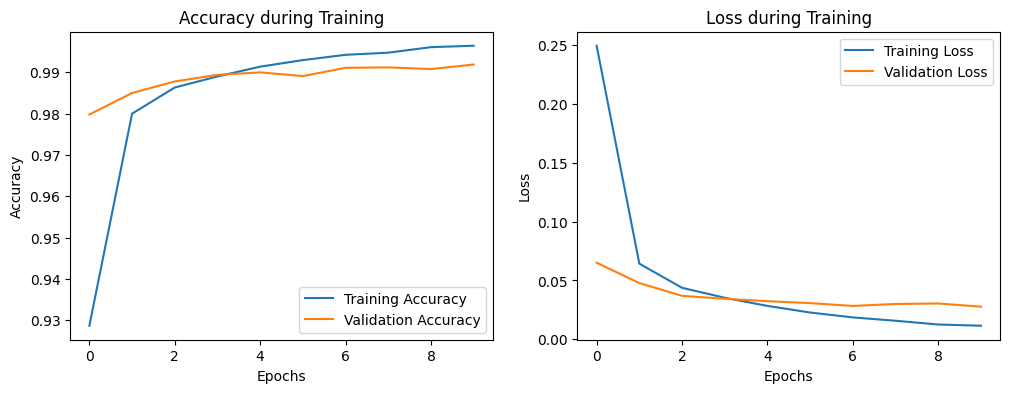

In [ ]:
# Plotting the accuracy and loss during training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Making predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report and confusion matrix
print(classification_report(y_true_classes, y_pred_classes))
print(confusion_matrix(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    0 1017    0    1    0    1    9    1    1]
 [   0    0    1 1005    0    2    0    0

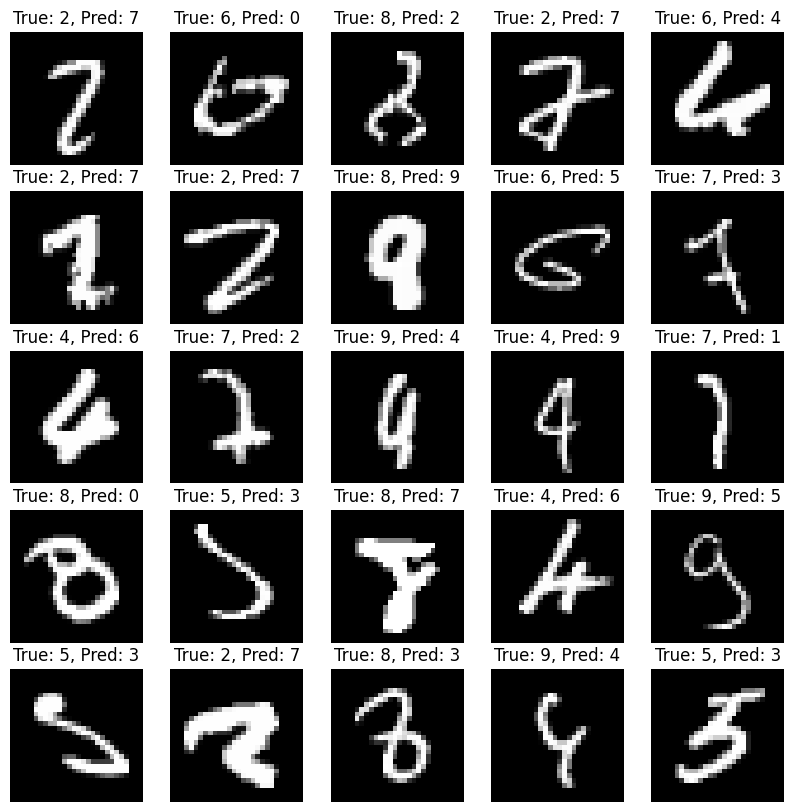

In [ ]:
misclassified_indexes = np.where(y_pred_classes != y_true_classes)[0]
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indexes[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_classes[index]}, Pred: {y_pred_classes[index]}')
    plt.axis('off')
plt.show()